# Crime Data

# Hierarchical

In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
cr = pd.read_csv("/media/gargi/Data/DataSets/crime_data.csv")

In [3]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [4]:
cr.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
cr.rename( columns={'Unnamed: 0':'Cities'}, inplace=True )

In [6]:
cr.head(5)

,Cities,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [7]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(cr.iloc[:,1:])
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


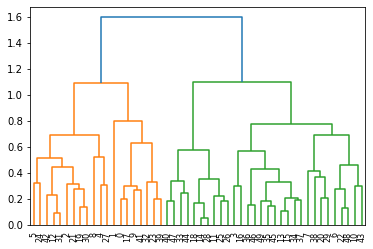

In [8]:

dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [9]:

hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [10]:

y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [11]:
Clusters

,Clusters
0,0
1,0
2,3
3,1
4,3
5,3
6,1
7,1
8,3
9,0


# k means

In [12]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [13]:
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


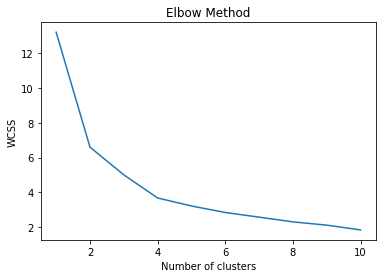

In [14]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
model=KMeans(n_clusters=4) 
model.fit(df_norm)

model.labels_

array([3, 2, 2, 3, 2, 2, 0, 0, 2, 3, 0, 1, 2, 0, 1, 0, 1, 3, 1, 2, 0, 2,
       1, 3, 0, 1, 1, 2, 1, 0, 2, 2, 3, 1, 0, 0, 0, 0, 0, 3, 1, 3, 2, 0,
       1, 0, 0, 1, 1, 0], dtype=int32)

In [16]:
md=pd.Series(model.labels_)  
cr['clust']=md 
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [17]:
cr.iloc[:,1:6].groupby(cr.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,5.852941,141.176471,73.647059,19.335294,0
1,3.600000,78.538462,52.076923,12.176923,1
2,10.966667,264.000000,76.500000,33.608333,2
3,13.937500,243.625000,53.750000,21.412500,3


# db scan

In [18]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

In [19]:
print(df_norm.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     float64
 2   UrbanPop  50 non-null     float64
 3   Rape      50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB
None


In [20]:
dbscan = DBSCAN(eps=0.4, min_samples=4)
dbscan.fit(df_norm)

DBSCAN(eps=0.4, min_samples=4)

In [21]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [22]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [23]:
cl

,cluster
0,0
1,-1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


we have 1 outlier

AS PER SUMMARY WE CAN SAY  THAT CITIES THAT COMES UNDER  CLUSTER 2 AND 3 HAS HIGHER CRIME RATES.

# Airlines

In [35]:
air = pd.read_csv("/media/gargi/Data/DataSets/EastWestAirlines.csv")

In [37]:
air.head(25)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [42]:
cd=air.drop(['ID#','cc2_miles','cc3_miles','Award?'],axis=1)

In [55]:
dfe_norm = norm_func(cd.iloc[:,:])
dfe_norm.head()

,Balance,Qual_miles,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.164211,0.302326,0.067398,0.075472,0.835905


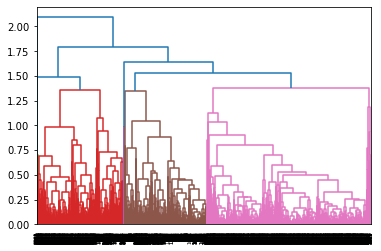

In [56]:
dendrogram = sch.dendrogram(sch.linkage(dfe_norm, method='complete'))

In [57]:
hce = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [58]:
Clusters

,Clusters
0,0
1,0
2,3
3,1
4,3
5,3
6,1
7,1
8,3
9,0


# KMeans

In [59]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [60]:
dfe_norm.head()

,Balance,Qual_miles,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.164211,0.302326,0.067398,0.075472,0.835905


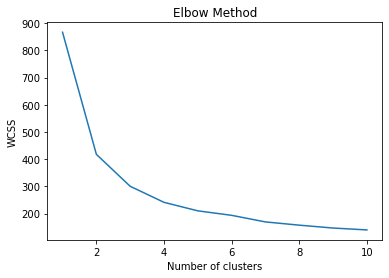

In [61]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(dfe_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [62]:
model=KMeans(n_clusters=3) 
model.fit(dfe_norm)

model.labels_

array([2, 2, 2, ..., 1, 0, 0], dtype=int32)

In [65]:
md=pd.Series(model.labels_)  
air['clust']=md 
dfe_norm.head()

,Balance,Qual_miles,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.164211,0.302326,0.067398,0.075472,0.835905


In [66]:
air.iloc[:,1:9].groupby(air.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo
clust,,,,,,,,
0,40390.901767,122.294700,1.110247,1.020495,1.004947,4602.569611,7.211307,394.066431
1,113167.028269,143.529329,3.778092,1.001413,1.024735,39570.766784,18.959717,502.669965
2,65908.672370,171.234388,1.128315,1.023097,1.005988,5181.325064,8.010265,488.349872


# db scan

In [67]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

In [68]:
print(df_norm.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Balance            3999 non-null   float64
 1   Qual_miles         3999 non-null   float64
 2   cc1_miles          3999 non-null   float64
 3   Bonus_miles        3999 non-null   float64
 4   Bonus_trans        3999 non-null   float64
 5   Flight_miles_12mo  3999 non-null   float64
 6   Flight_trans_12    3999 non-null   float64
 7   Days_since_enroll  3999 non-null   float64
dtypes: float64(8)
memory usage: 250.1 KB
None


In [69]:
dbscan = DBSCAN(eps=0.4, min_samples=8)
dbscan.fit(dfe_norm)

DBSCAN(eps=0.4, min_samples=8)

In [70]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [72]:
cle=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [73]:
cle

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


Cluster 1 is the set of high  customers who have highest number of non-flight bonus transaction miles and highest miles eligible for award travel.
Cluster 2 customers have low no of miles eligible for award travel as well as low bonus miles and trans.
Cluster 0 has the lowest digits in all segments.